In [1]:
! ls

Eric––Project_1_Workbook.ipynb       lorela_working_nb.ipynb
README.md                            microsoft_movie_needs_analysis.ipynb
imdb.title.crew.csv.gz               top_movie_list.txt
imdb.title.ratings.csv.gz            unzippedData
jmark_working_nb.ipynb


In [2]:
! cd unzippedData

In [3]:
! ls

Eric––Project_1_Workbook.ipynb       lorela_working_nb.ipynb
README.md                            microsoft_movie_needs_analysis.ipynb
imdb.title.crew.csv.gz               top_movie_list.txt
imdb.title.ratings.csv.gz            unzippedData
jmark_working_nb.ipynb


In [4]:
! cd /unzippedData

/bin/bash: line 0: cd: /unzippedData: No such file or directory


In [5]:
! ls

Eric––Project_1_Workbook.ipynb       lorela_working_nb.ipynb
README.md                            microsoft_movie_needs_analysis.ipynb
imdb.title.crew.csv.gz               top_movie_list.txt
imdb.title.ratings.csv.gz            unzippedData
jmark_working_nb.ipynb


In [6]:
cd unzippedData

/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/unzippedData


In [7]:
! ls

bom.movie_gross.csv       imdb.title.basics.csv     rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       rt.movie_info.tsv         tn.movie_budgets.csv


In [8]:
#Importing pandas

import pandas as pd
import datetime


In [9]:
# Defining top performing movies 
    # highest grossing and highest ROI
    
    # action: clean, filter, analyze this dataset

    # get the list of value counts of top genres (and actors, directors, studios, writers) based on this new dataset created 
        # look back on other (top_critic=1,  i.e. rating >4)
    
    # draw correlations between the top performing movies and genre, directors, studios, writers, actors, ratings
    
    # also looking into movies performing poorly (given enough time)

In [10]:
cd unzippedData

[Errno 2] No such file or directory: 'unzippedData'
/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/unzippedData


In [11]:
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv")

movie_gross_df = pd.read_csv("bom.movie_gross.csv")

In [12]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# Engineering two new features for the movie budgets dataframe called domestic profit and worldwide profit, 
# which is the production budget subtracted from domestic gross and worldwide gross, respectively

#First we have to clean the columns, removing the dollar sign and commas and creating integers

movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].map(lambda x: x[1:])



In [14]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"


In [15]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].map(lambda x: int(x.replace(",","")))

In [16]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"


In [17]:
type(movie_budgets_df['domestic_gross'][1])

numpy.int64

In [18]:
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))

In [19]:
type(movie_budgets_df['worldwide_gross'][1])

numpy.int64

In [20]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].map(lambda x: int(x[1:].replace(",","")))

In [21]:
type(movie_budgets_df['production_budget'][1])

numpy.int64

In [22]:
movie_budgets_df['domestic_profit'] = movie_budgets_df['domestic_gross'] - movie_budgets_df['production_budget']

movie_budgets_df['worldwide_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']


In [23]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747


In [24]:
movie_budgets_df['domestic_roi'] = movie_budgets_df['domestic_profit']/movie_budgets_df['production_budget']

In [25]:
movie_budgets_df['worldwide_roi'] = movie_budgets_df['worldwide_profit']/movie_budgets_df['production_budget']

In [26]:
movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1.262718,5.827114
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,9420425,663420425,0.031401,2.211401
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,-0.236586,1.186484
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,-99925825,579620923,-0.333086,1.932070


In [27]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696


In [28]:
movie_budgets_df["worldwide_profit_margin"] = movie_budgets_df["worldwide_profit"]/movie_budgets_df["worldwide_gross"]

movie_budgets_df["domestic_profit_margin"] = movie_budgets_df["domestic_profit"]/movie_budgets_df['domestic_gross']

In [29]:

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859


In [30]:
movie_budgets_df['month'] = movie_budgets_df['release_date'].map(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").month)

movie_budgets_df['year'] = movie_budgets_df['release_date'].map(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").year)

In [31]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5782 non-null   int64  
 1   release_date             5782 non-null   object 
 2   movie                    5782 non-null   object 
 3   production_budget        5782 non-null   int64  
 4   domestic_gross           5782 non-null   int64  
 5   worldwide_gross          5782 non-null   int64  
 6   domestic_profit          5782 non-null   int64  
 7   worldwide_profit         5782 non-null   int64  
 8   domestic_roi             5782 non-null   float64
 9   worldwide_roi            5782 non-null   float64
 10  worldwide_profit_margin  5782 non-null   float64
 11  domestic_profit_margin   5782 non-null   float64
 12  month                    5782 non-null   int64  
 13  year                     5782 non-null   int64  
dtypes: float64(4), int64(8),

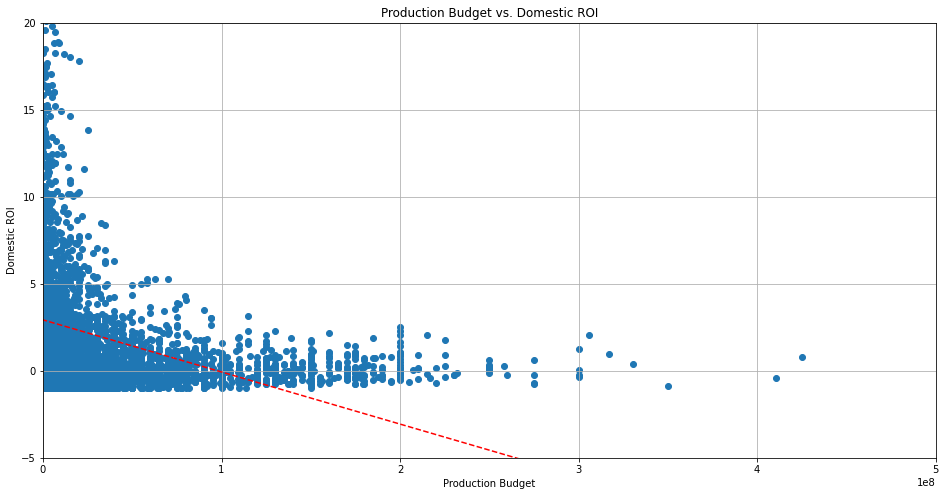

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (16,8))

X = movie_budgets_df['production_budget']

Y = movie_budgets_df['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(0, 500000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

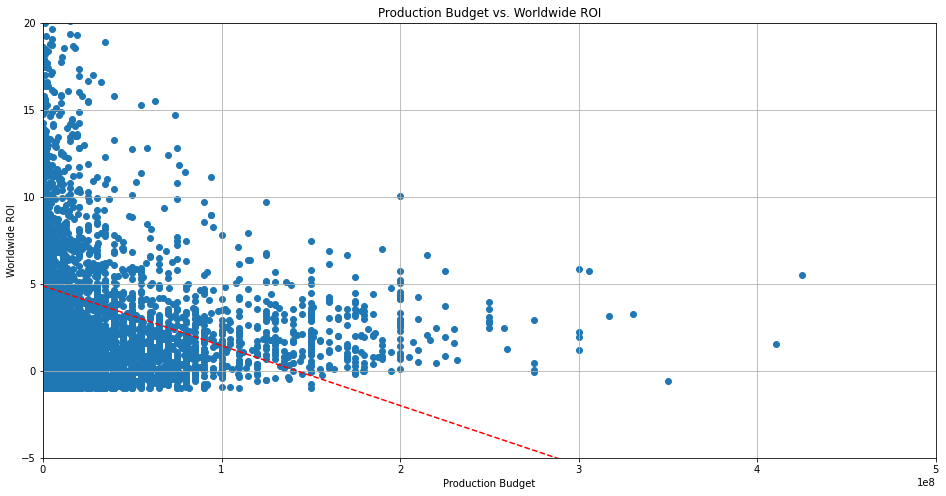

In [33]:
fig, ax = plt.subplots(figsize = (16,8))

X = movie_budgets_df['production_budget']

Y = movie_budgets_df['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(0, 500000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

In [34]:
relevant_movies = movie_budgets_df[(movie_budgets_df['worldwide_gross'] > 0) &(movie_budgets_df['domestic_gross'] > 0) & (movie_budgets_df['production_budget'] >= 5000000) & (movie_budgets_df['year'] != 2020) ]
relevant_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859,12,2017


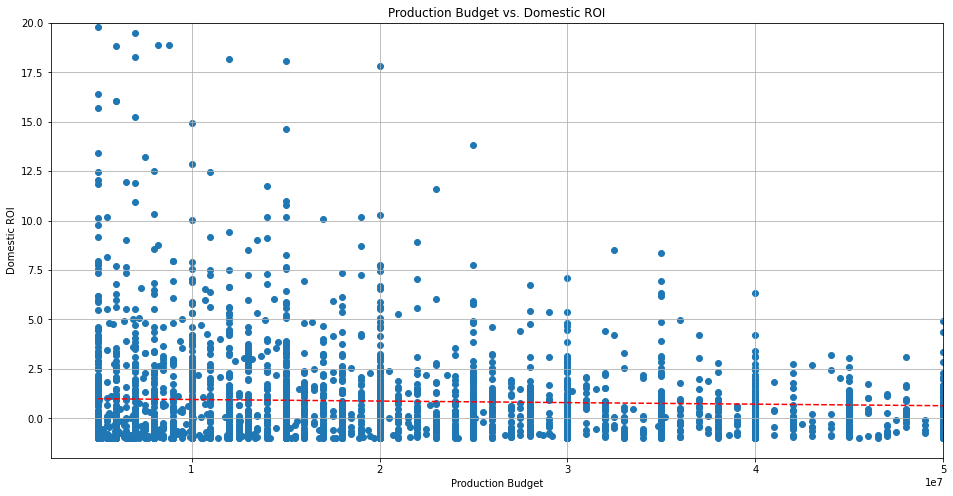

In [35]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 5 and 50 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(2500000, 50000000)
plt.ylim(-2, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--"); #plot trendline

In [97]:
num_movies_5_to_50_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_5_to_50_with_neg_return_dom


1496

In [98]:
per_movies_5_to_50_with_neg_return_dom = (num_movies_5_to_50_with_neg_return_dom/(num_movies_5_to_50_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_5_to_50_with_neg_return_dom

47.856685860524635

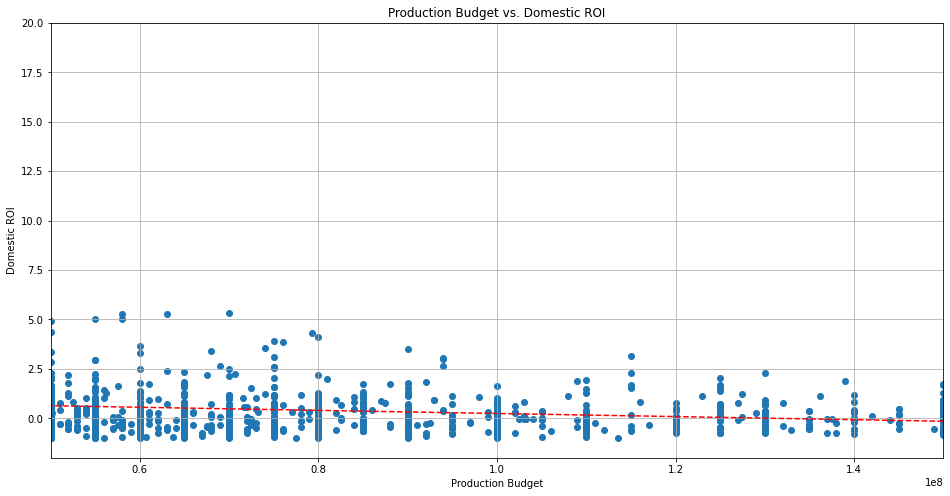

In [36]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 50 and 150 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(50000000, 150000000)
plt.ylim(-2, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--"); #plot trendline

In [80]:
num_movies_50_to_150_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] >= 50000000) & (relevant_movies['production_budget'] <= 150000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_50_to_150_with_neg_return_dom

562

In [93]:
per_movies_50_to_150_with_neg_return_dom = (num_movies_50_to_150_with_neg_return_dom/(num_movies_50_to_150_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] >= 50000000) & (relevant_movies['production_budget'] <= 150000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_50_to_150_with_neg_return_dom

54.03846153846153

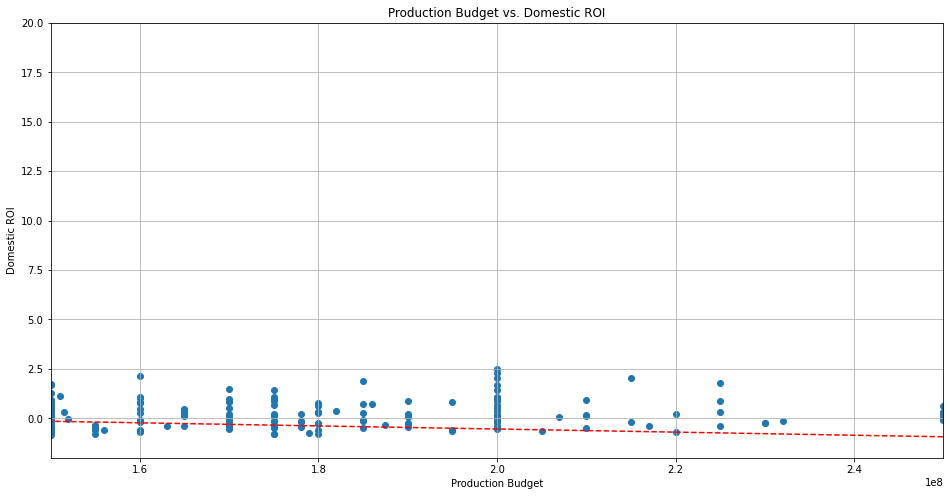

In [37]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 150 and 250 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(150000000, 250000000)
plt.ylim(-2, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--"); #plot trendline

In [81]:
num_movies_150_to_250_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] >= 150000000) & (relevant_movies['production_budget'] <= 250000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_150_to_250_with_neg_return_dom

82

In [94]:
per_movies_150_to_250_with_neg_return_dom = (num_movies_150_to_250_with_neg_return_dom/(num_movies_150_to_250_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] >= 150000000) & (relevant_movies['production_budget'] <= 250000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_150_to_250_with_neg_return_dom

46.06741573033708

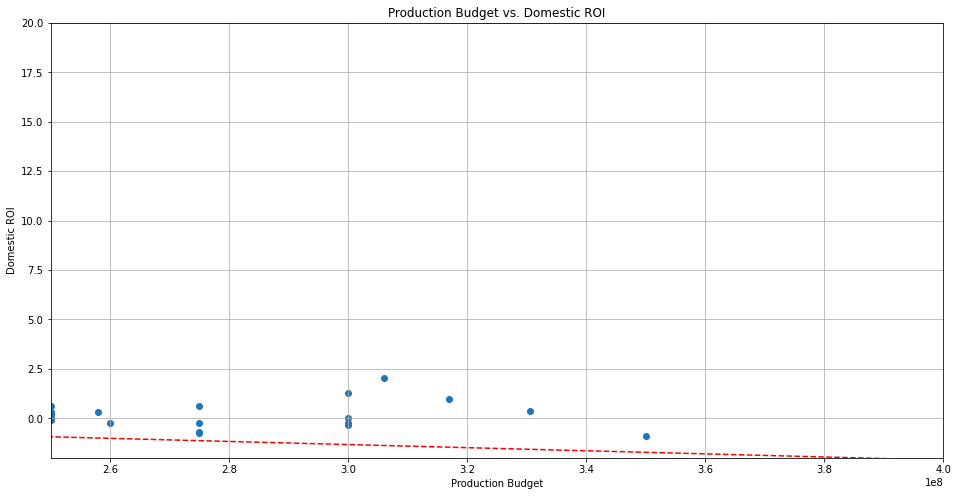

In [38]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 250 and 400 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(250000000, 400000000)
plt.ylim(-2, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--"); #plot trendline

In [82]:
num_movies_250_to_400_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] >= 250000000) & (relevant_movies['production_budget'] <= 400000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_250_to_400_with_neg_return_dom


8

In [95]:
per_movies_250_to_400_with_neg_return_dom = (num_movies_250_to_400_with_neg_return_dom/(num_movies_250_to_400_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] >= 250000000) & (relevant_movies['production_budget'] <= 400000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_250_to_400_with_neg_return_dom

38.095238095238095

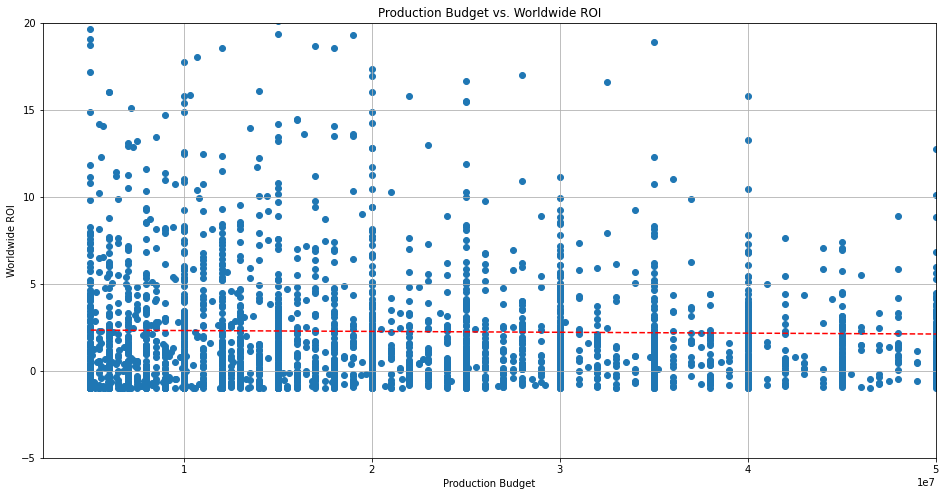

In [73]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 5 and 50 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(2500000, 50000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

In [99]:
num_movies_5_to_50_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_5_to_50_with_neg_return_ww

1043

In [100]:
per_movies_5_to_50_with_neg_return_ww = (num_movies_5_to_50_with_neg_return_ww/(num_movies_5_to_50_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_5_to_50_with_neg_return_ww

33.36532309660908

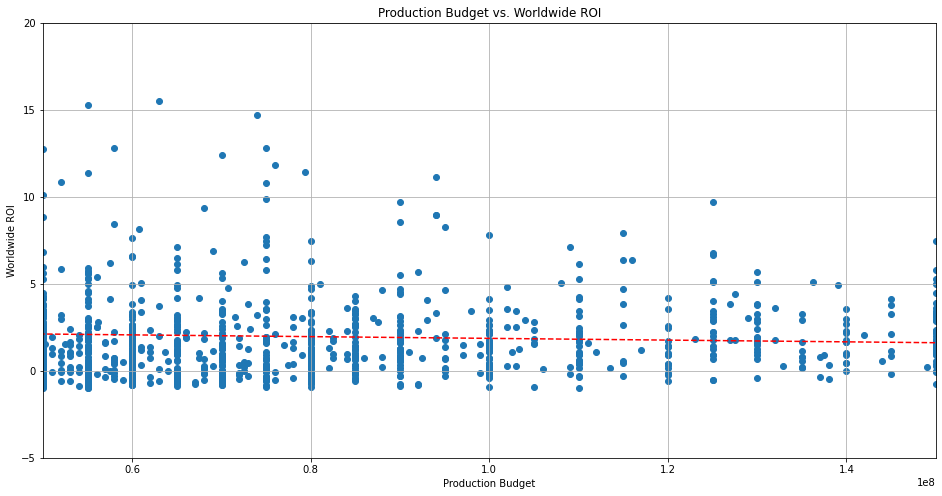

In [74]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 50 and 150 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(50000000, 150000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

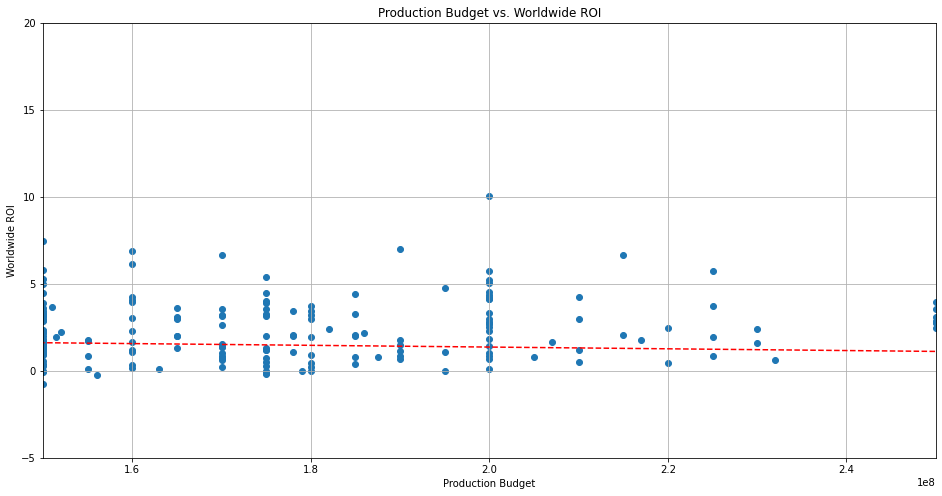

In [75]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 150 and 250 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(150000000, 250000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

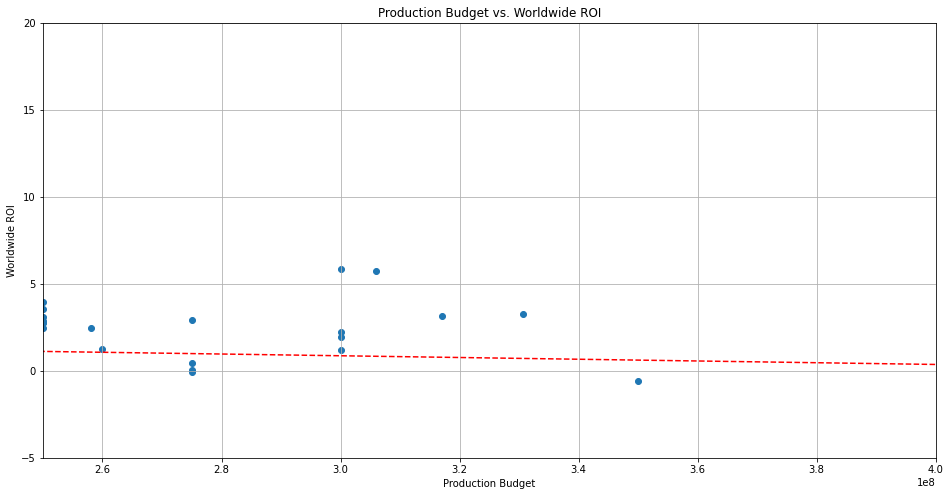

In [42]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 250 and 400 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(250000000, 400000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

In [43]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859,12,2017


In [44]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859,12,2017


In [45]:
top_movies = movie_budgets_df[(movie_budgets_df['worldwide_gross'] > 0) & (movie_budgets_df['production_budget'] >= 5000000) & (movie_budgets_df['worldwide_roi'] >= 2) & (movie_budgets_df['domestic_roi'] >= 2) & (movie_budgets_df['year'] != 2020) & (movie_budgets_df['year'] >= 2010)]
top_movies.head()
top_movies.shape


(189, 14)

In [46]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,0.850972,0.673308,12,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,0.869606,0.670382,6,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,0.851660,0.714310,2,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,408581744,1042520711,2.042909,5.212604,0.839037,0.671367,6,2018
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706,2.150089,6.869998,0.872935,0.682549,3,2017


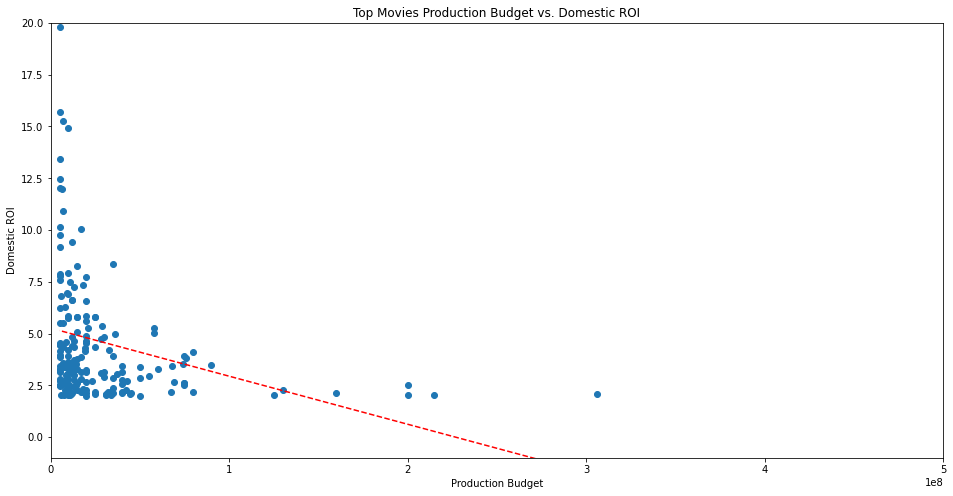

In [47]:
fig, ax = plt.subplots(figsize=(16,8))

X = top_movies['production_budget']

Y = top_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Top Movies Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(0, 500000000)
plt.ylim(-1, 20)

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

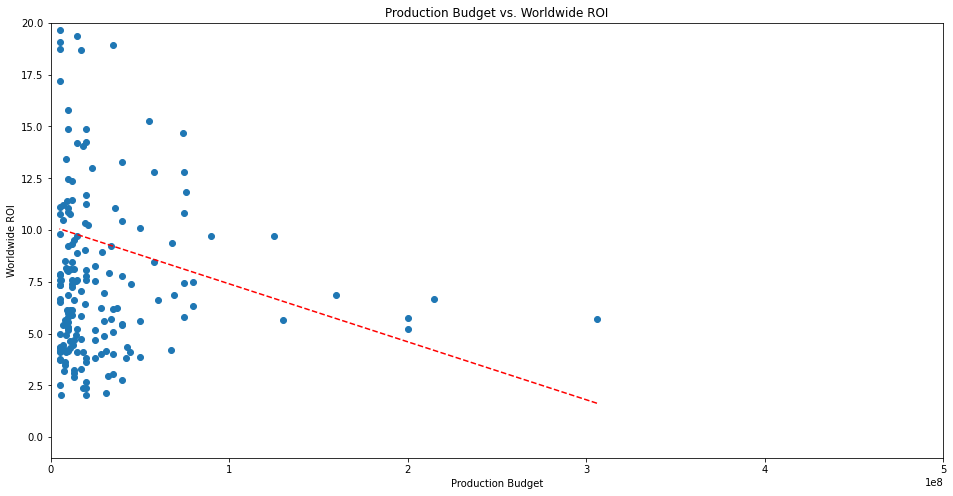

In [48]:
fig, ax = plt.subplots(figsize=(16,8))

X = top_movies['production_budget']

Y = top_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(0, 500000000)
plt.ylim(-1, 20)

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

In [49]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,0.850972,0.673308,12,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,0.869606,0.670382,6,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,0.851660,0.714310,2,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,408581744,1042520711,2.042909,5.212604,0.839037,0.671367,6,2018
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706,2.150089,6.869998,0.872935,0.682549,3,2017


In [50]:
movies_month = movie_budgets_df.groupby('month').mean()

In [51]:
movies_month.drop('id', axis=1, inplace=True)

In [52]:
movies_month.head()

,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,,,,,
1,2.084349e+07,2.394962e+07,4.656382e+07,3.106128e+06,2.572033e+07,1.935052,3.198986,-inf,-inf,2003.489914
2,2.804642e+07,3.541465e+07,7.154453e+07,7.368234e+06,4.349811e+07,2.107934,3.547812,-inf,-inf,2004.579082
3,3.078208e+07,3.857299e+07,8.063337e+07,7.790907e+06,4.985129e+07,1.324664,3.449646,-inf,-inf,2005.542553
4,2.380283e+07,2.732840e+07,5.992026e+07,3.525568e+06,3.611743e+07,1.037507,2.776726,-inf,-inf,2005.138767
5,4.713520e+07,6.669795e+07,1.622680e+08,1.956275e+07,1.151328e+08,1.866915,4.351029,-inf,-inf,2003.653563


In [53]:
movies_month.drop({'domestic_gross', 'worldwide_gross', 'domestic_profit', 'worldwide_profit', 'worldwide_profit_margin', 'domestic_profit_margin', 'year'}, axis=1, inplace=True)

In [54]:
movies_month

,production_budget,domestic_roi,worldwide_roi
month,,,
1,2.084349e+07,1.935052,3.198986
2,2.804642e+07,2.107934,3.547812
3,3.078208e+07,1.324664,3.449646
4,2.380283e+07,1.037507,2.776726
5,4.713520e+07,1.866915,4.351029
6,4.309912e+07,5.255122,6.889714
7,4.254616e+07,2.425521,5.040113
8,2.555609e+07,2.738651,4.380376
9,2.181290e+07,1.271824,2.824510


In [55]:
movies_month['movie_count'] = movie_budgets_df['month'].value_counts()
movies_month

,production_budget,domestic_roi,worldwide_roi,movie_count
month,,,,
1,2.084349e+07,1.935052,3.198986,347
2,2.804642e+07,2.107934,3.547812,392
3,3.078208e+07,1.324664,3.449646,470
4,2.380283e+07,1.037507,2.776726,454
5,4.713520e+07,1.866915,4.351029,407
6,4.309912e+07,5.255122,6.889714,479
7,4.254616e+07,2.425521,5.040113,440
8,2.555609e+07,2.738651,4.380376,496
9,2.181290e+07,1.271824,2.824510,493


In [56]:
#movies_month.rename({'domestic_profit_to_budget_ratio': 'domestic_roi', 'worldwide_roi': 'worldwide_roi'}, axis=1, inplace=True)
#movies_month

In [57]:
movies_month.reset_index(inplace=True)

In [58]:
movies_month

,month,production_budget,domestic_roi,worldwide_roi,movie_count
0,1,2.084349e+07,1.935052,3.198986,347
1,2,2.804642e+07,2.107934,3.547812,392
2,3,3.078208e+07,1.324664,3.449646,470
3,4,2.380283e+07,1.037507,2.776726,454
4,5,4.713520e+07,1.866915,4.351029,407
5,6,4.309912e+07,5.255122,6.889714,479
6,7,4.254616e+07,2.425521,5.040113,440
7,8,2.555609e+07,2.738651,4.380376,496
8,9,2.181290e+07,1.271824,2.824510,493
9,10,2.039266e+07,2.043329,4.089145,573


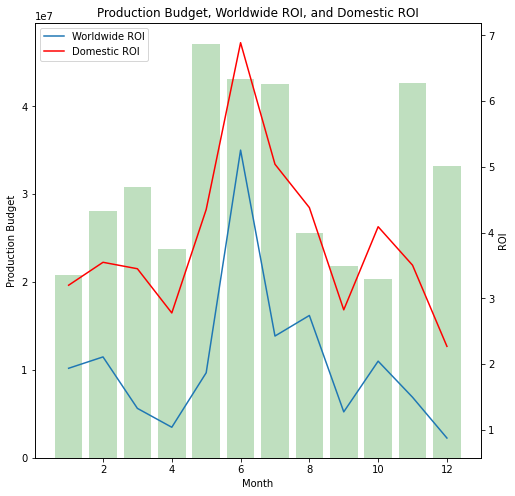

In [59]:
fig, ax1 = plt.subplots(figsize = (8, 8))

x = movies_month['month']
h = movies_month['production_budget']
y1 = movies_month['domestic_roi']
y2 = movies_month['worldwide_roi']


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

ax1.bar(x, h, alpha = 0.25, color='green')
#plt.locator_params(axis=x, nbins=12)

line1, = ax2.plot(x, y1)
line2, = ax2.plot(x, y2, color='red')


ax1.set_title('Production Budget, Worldwide ROI, and Domestic ROI')
ax1.set_xlabel('Month')
ax1.set_ylabel('Production Budget')

ax2.set_ylabel('ROI')
ax2.legend([line1, line2],['Worldwide ROI', 'Domestic ROI'], loc='upper left');


#
#ax3.legend([loc='upper right');
             
#ax1.set_yticks([1,2,3,4,5,6,7,8,9])



In [60]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,0.850972,0.673308,12,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,0.869606,0.670382,6,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,0.851660,0.714310,2,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,408581744,1042520711,2.042909,5.212604,0.839037,0.671367,6,2018
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706,2.150089,6.869998,0.872935,0.682549,3,2017


In [61]:
top_movies_month = top_movies.groupby('month').mean()

In [62]:
top_movies_month.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,,,,,,
1,62.833333,1.086667e+07,6.034380e+07,1.255743e+08,4.947714e+07,1.147076e+08,5.404791,13.053202,0.890740,0.774913,2016.000000
2,54.588235,3.208824e+07,1.423665e+08,2.707541e+08,1.102782e+08,2.386659e+08,5.172297,9.162268,0.859232,0.772673,2014.176471
3,56.157895,2.712105e+07,1.120921e+08,1.977578e+08,8.497101e+07,1.706367e+08,4.223054,6.830238,0.843288,0.765718,2015.263158
4,53.545455,1.336364e+07,6.536730e+07,9.369696e+07,5.200366e+07,8.033332e+07,4.004078,6.260764,0.821920,0.757268,2014.454545
5,58.615385,2.057692e+07,9.649785e+07,1.718283e+08,7.592092e+07,1.512513e+08,4.419678,7.527392,0.869696,0.796818,2015.538462


In [63]:
top_movies_month.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,,,,,,
1,62.833333,1.086667e+07,6.034380e+07,1.255743e+08,4.947714e+07,1.147076e+08,5.404791,13.053202,0.890740,0.774913,2016.000000
2,54.588235,3.208824e+07,1.423665e+08,2.707541e+08,1.102782e+08,2.386659e+08,5.172297,9.162268,0.859232,0.772673,2014.176471
3,56.157895,2.712105e+07,1.120921e+08,1.977578e+08,8.497101e+07,1.706367e+08,4.223054,6.830238,0.843288,0.765718,2015.263158
4,53.545455,1.336364e+07,6.536730e+07,9.369696e+07,5.200366e+07,8.033332e+07,4.004078,6.260764,0.821920,0.757268,2014.454545
5,58.615385,2.057692e+07,9.649785e+07,1.718283e+08,7.592092e+07,1.512513e+08,4.419678,7.527392,0.869696,0.796818,2015.538462


In [64]:
top_movies_month.drop('id', axis=1, inplace=True)

In [65]:
top_movies_month.drop({'domestic_gross', 'worldwide_gross', 'domestic_profit', 'worldwide_profit'}, axis=1, inplace=True)

In [66]:
#top_movies_month.rename({'domestic_profit_to_budget_ratio': 'domestic_roi', 'worldwide_profit_to_budget_ratio': 'worldwide_roi'}, axis=1, inplace=True)

In [67]:
top_movies_month.head()

,production_budget,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,
1,1.086667e+07,5.404791,13.053202,0.890740,0.774913,2016.000000
2,3.208824e+07,5.172297,9.162268,0.859232,0.772673,2014.176471
3,2.712105e+07,4.223054,6.830238,0.843288,0.765718,2015.263158
4,1.336364e+07,4.004078,6.260764,0.821920,0.757268,2014.454545
5,2.057692e+07,4.419678,7.527392,0.869696,0.796818,2015.538462


In [68]:
top_movies_month.drop({'worldwide_profit_margin', 'domestic_profit_margin'}, axis=1, inplace=True)

In [69]:
top_movies_month

,production_budget,domestic_roi,worldwide_roi,year
month,,,,
1,1.086667e+07,5.404791,13.053202,2016.000000
2,3.208824e+07,5.172297,9.162268,2014.176471
3,2.712105e+07,4.223054,6.830238,2015.263158
4,1.336364e+07,4.004078,6.260764,2014.454545
5,2.057692e+07,4.419678,7.527392,2015.538462
6,5.016667e+07,4.242069,9.235916,2014.111111
7,3.741667e+07,4.280008,9.761095,2014.277778
8,1.588889e+07,4.488113,8.277130,2014.611111
9,1.275714e+07,5.028713,9.103453,2013.000000


In [70]:
top_movies_month['movie_count'] = movie_budgets_df['month'].value_counts()
top_movies_month.head()

,production_budget,domestic_roi,worldwide_roi,year,movie_count
month,,,,,
1,1.086667e+07,5.404791,13.053202,2016.000000,347
2,3.208824e+07,5.172297,9.162268,2014.176471,392
3,2.712105e+07,4.223054,6.830238,2015.263158,470
4,1.336364e+07,4.004078,6.260764,2014.454545,454
5,2.057692e+07,4.419678,7.527392,2015.538462,407


In [71]:
top_movies_month.reset_index(inplace=True)

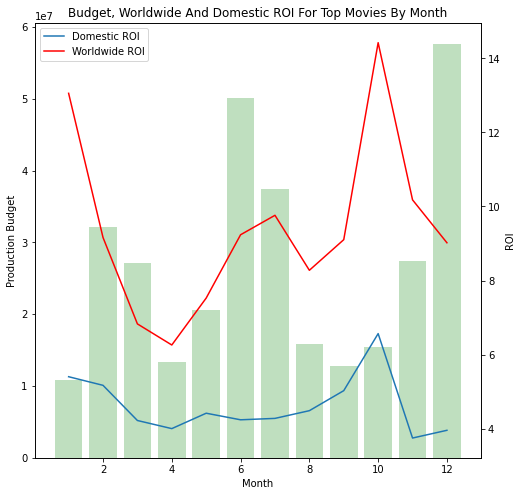

In [72]:
fig, ax1 = plt.subplots(figsize = (8, 8))

x = top_movies_month['month']
h = top_movies_month['production_budget']
y1 = top_movies_month['domestic_roi']
y2 = top_movies_month['worldwide_roi']


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

ax1.bar(x, h, alpha = 0.25, color='green')
#plt.locator_params(axis=x, nbins=12)

line1, = ax2.plot(x, y1)
line2, = ax2.plot(x, y2, color='red')


ax1.set_title('Budget, Worldwide And Domestic ROI For Top Movies By Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Production Budget')

ax2.set_ylabel('ROI')
ax2.legend([line1, line2],['Domestic ROI', 'Worldwide ROI'], loc='upper left');